## Student Performance Indicator


In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


In [3]:
df = pd.read_csv('data/stud.csv')

In [4]:
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


In [5]:
df.shape

(1000, 8)

### 2.2 Dataset information

### 3. Data Checks to perform

In [6]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [9]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [10]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [11]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [13]:
print("Categories in 'gender' variable :	",end=" ")
print(df['gender'].unique())

print("Categories in 'race_ethnicity' variable :	",end=" ")
print(df['race_ethnicity'].unique())

print("Categories in 'parental_level_of_education' variable :	",end=" ")
print(df['parental_level_of_education'].unique())

print("Categories in 'lunch' variable :	",end=" ")
print(df['lunch'].unique())

print("Categories in 'test_preparation_course' variable :	",end=" ")
print(df['test_preparation_course'].unique())


Categories in 'gender' variable :	 ['female' 'male']
Categories in 'race_ethnicity' variable :	 ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental_level_of_education' variable :	 ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable :	 ['standard' 'free/reduced']
Categories in 'test_preparation_course' variable :	 ['none' 'completed']


In [16]:
numeric_features = [ feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [ feature for feature in df.columns if df[feature].dtype == 'O']

print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 3 numerical features : ['math_score', 'reading_score', 'writing_score']

We have 5 categorical features : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [17]:
df['Total score'] = df['math_score']+ df['reading_score'] + df['writing_score']
df['average'] = df['Total score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [18]:
reading_full = df[df['reading_score'] == 100]['average'].count()
writing_full = df[df['writing_score'] == 100]['average'].count()
math_full = df[df['math_score'] == 100]['average'].count()

print(f'Number of students with full marks in Maths: {math_full}')
print(f'Number of students with full marks in Writing: {writing_full}')
print(f'Number of students with full marks in Reading: {reading_full}')

Number of students with full marks in Maths: 7
Number of students with full marks in Writing: 14
Number of students with full marks in Reading: 17


In [19]:
reading_less_20 = df[df['reading_score'] <= 20]['average'].count()
writing_less_20 = df[df['writing_score'] <= 20]['average'].count()
math_less_20 = df[df['math_score'] <= 20]['average'].count()

print(f'Number of students with less than 20 marks in Maths: {math_less_20}')
print(f'Number of students with less than 20 marks in Writing: {writing_less_20}')
print(f'Number of students with less than 20 marks in Reading: {reading_less_20}')

Number of students with less than 20 marks in Maths: 4
Number of students with less than 20 marks in Writing: 3
Number of students with less than 20 marks in Reading: 1


### 4. Exploring Data ( Visualization )
#### 4.1 Visualize average score distribution to make some conclusion. 
- Histogram
- Kernel Distribution Function (KDE)

In [23]:
print(df.columns)


Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score', 'Total score', 'average'],
      dtype='object')


<Axes: title={'center': 'Another Plot'}, xlabel='average', ylabel='Count'>

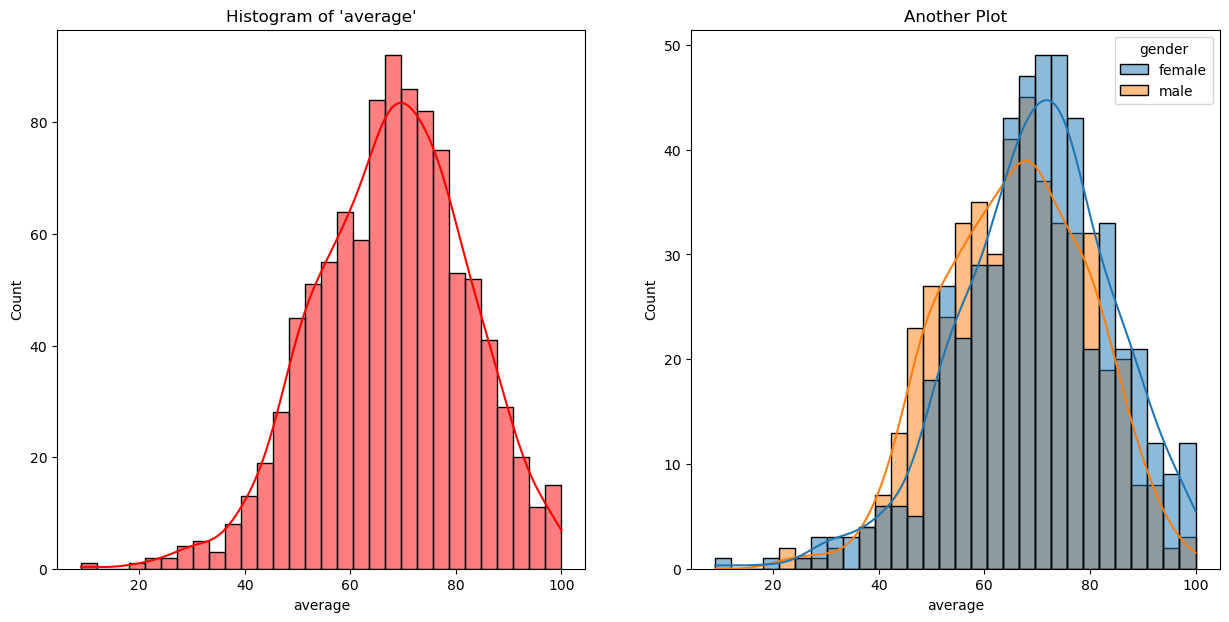

In [25]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))  # Use plt.subplots() instead of plt.subplot()
axs[0].set_title("Histogram of 'average'")
sns.histplot(data=df, x='average', bins=30, kde=True, color='r', ax=axs[0])

# If you want to use the second subplot:
axs[1].set_title("Another Plot")
sns.histplot(data=df, x='average', bins=30, kde=True, color='b',hue='gender', ax=axs[1])  # Example for a second plot


<Axes: title={'center': 'total score'}, xlabel='Total score', ylabel='Count'>

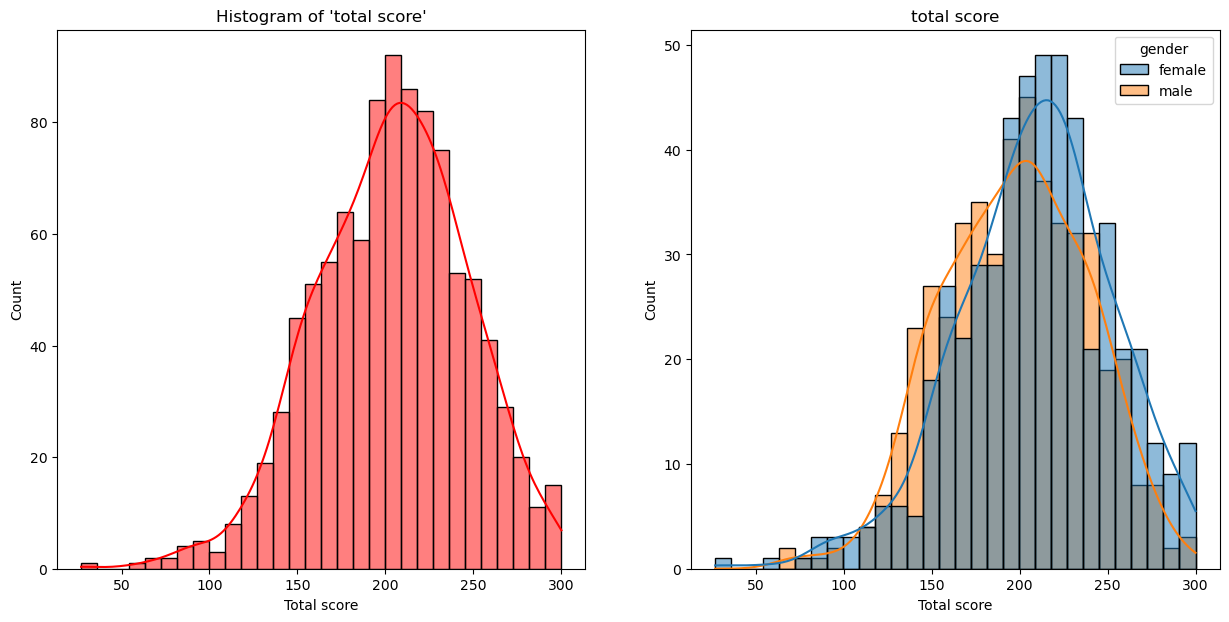

In [26]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))  # Use plt.subplots() instead of plt.subplot()
axs[0].set_title("Histogram of 'total score'")
sns.histplot(data=df, x='Total score', bins=30, kde=True, color='r', ax=axs[0])

# If you want to use the second subplot:
axs[1].set_title("total score")
sns.histplot(data=df, x='Total score', bins=30, kde=True, color='b',hue='gender', ax=axs[1])  # Example for a second plot


<Axes: title={'center': 'Mlae'}, xlabel='average', ylabel='Count'>

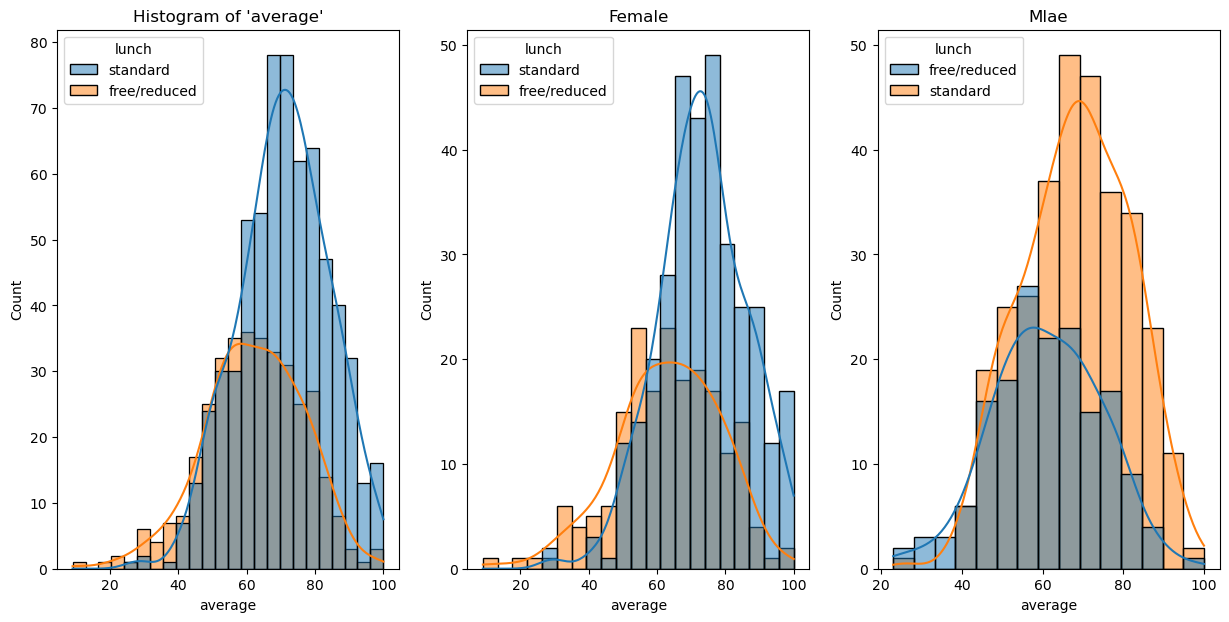

In [29]:
fig, axs = plt.subplots(1, 3, figsize=(15, 7))  # Use plt.subplots() instead of plt.subplot()
axs[0].set_title("Histogram of 'average'")
sns.histplot(data=df, x='average', kde=True,hue='lunch', ax=axs[0])

# If you want to use the second subplot:
axs[1].set_title("Female")
sns.histplot(data=df[df.gender=='female'], x='average', kde=True, color='b',hue='lunch', ax=axs[1]) 
axs[2].set_title("Mlae")
sns.histplot(data=df[df.gender=='male'], x='average', kde=True, color='b',hue='lunch', ax=axs[2]) 


<Axes: title={'center': 'Mlae'}, xlabel='average', ylabel='Count'>

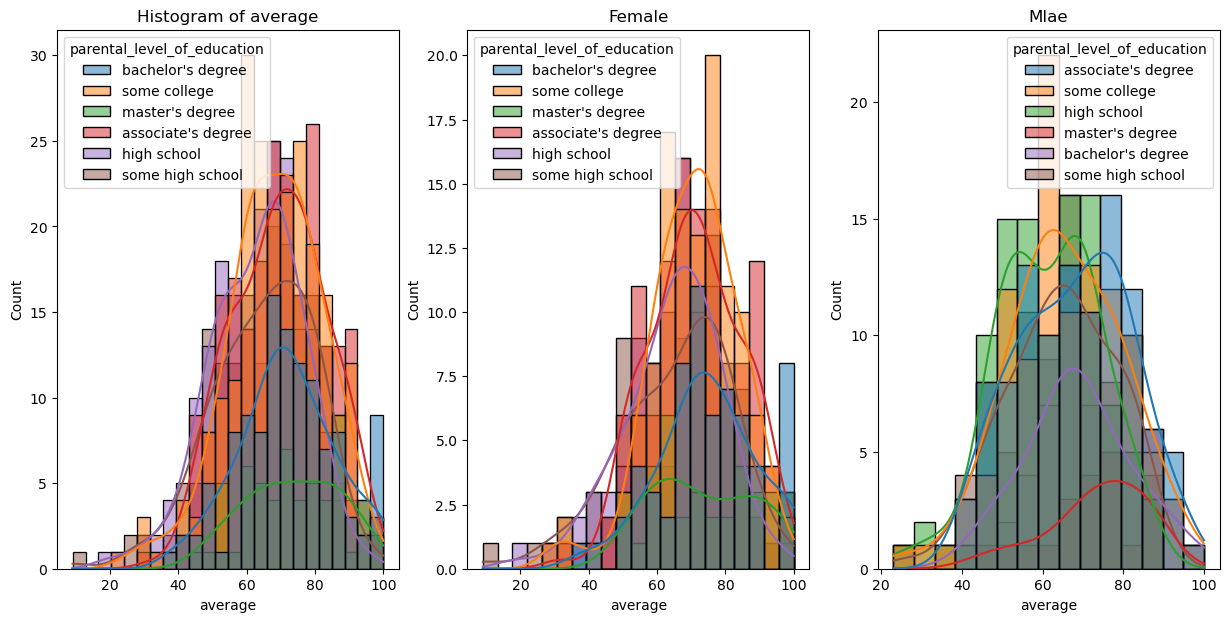

In [31]:
fig, axs = plt.subplots(1, 3, figsize=(15, 7))  # Use plt.subplots() instead of plt.subplot()
axs[0].set_title("Histogram of average")
sns.histplot(data=df, x='average', kde=True,hue='parental_level_of_education', ax=axs[0])
axs[1].set_title("Female")
sns.histplot(data=df[df.gender=='female'], x='average', kde=True, color='b',hue='parental_level_of_education', ax=axs[1]) 
axs[2].set_title("Mlae")
sns.histplot(data=df[df.gender=='male'], x='average', kde=True, color='g',hue='parental_level_of_education', ax=axs[2])

<Axes: title={'center': 'Male'}, xlabel='average', ylabel='Count'>

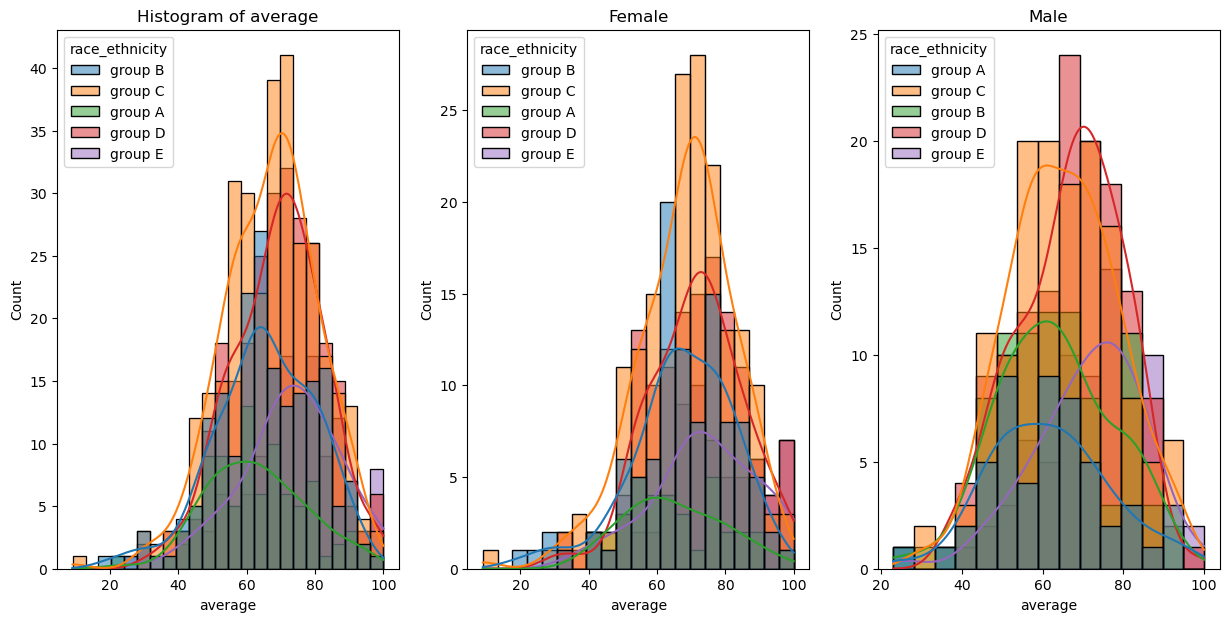

In [32]:
fig, axs = plt.subplots(1, 3, figsize=(15, 7))  # Use plt.subplots() instead of plt.subplot()
axs[0].set_title("Histogram of average")
sns.histplot(data=df, x='average', kde=True,hue='race_ethnicity', ax=axs[0])
axs[1].set_title("Female")
sns.histplot(data=df[df.gender=='female'], x='average', kde=True, color='b',hue='race_ethnicity', ax=axs[1]) 
axs[2].set_title("Male")
sns.histplot(data=df[df.gender=='male'], x='average', kde=True, color='g',hue='race_ethnicity', ax=axs[2])